In [ ]:
#import packag
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import math
import operator
from sklearn.linear_model import LinearRegression


In [ ]:
df=pd.read_csv('/content/supermarket.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

In [ ]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,200815,20080604,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,NaN,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,200626,20060824,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,NaN,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [ ]:
Df = df.copy()
Df.dropna(inplace=True)
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433142 entries, 0 to 578080
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 433142 non-null  int64  
 1   SHOP_DATE                 433142 non-null  int64  
 2   SHOP_WEEKDAY              433142 non-null  int64  
 3   SHOP_HOUR                 433142 non-null  int64  
 4   QUANTITY                  433142 non-null  int64  
 5   SPEND                     433142 non-null  float64
 6   PROD_CODE                 433142 non-null  object 
 7   PROD_CODE_10              433142 non-null  object 
 8   PROD_CODE_20              433142 non-null  object 
 9   PROD_CODE_30              433142 non-null  object 
 10  PROD_CODE_40              433142 non-null  object 
 11  CUST_CODE                 433142 non-null  object 
 12  CUST_PRICE_SENSITIVITY    433142 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

In [ ]:
Df.to_csv("notnull.csv")

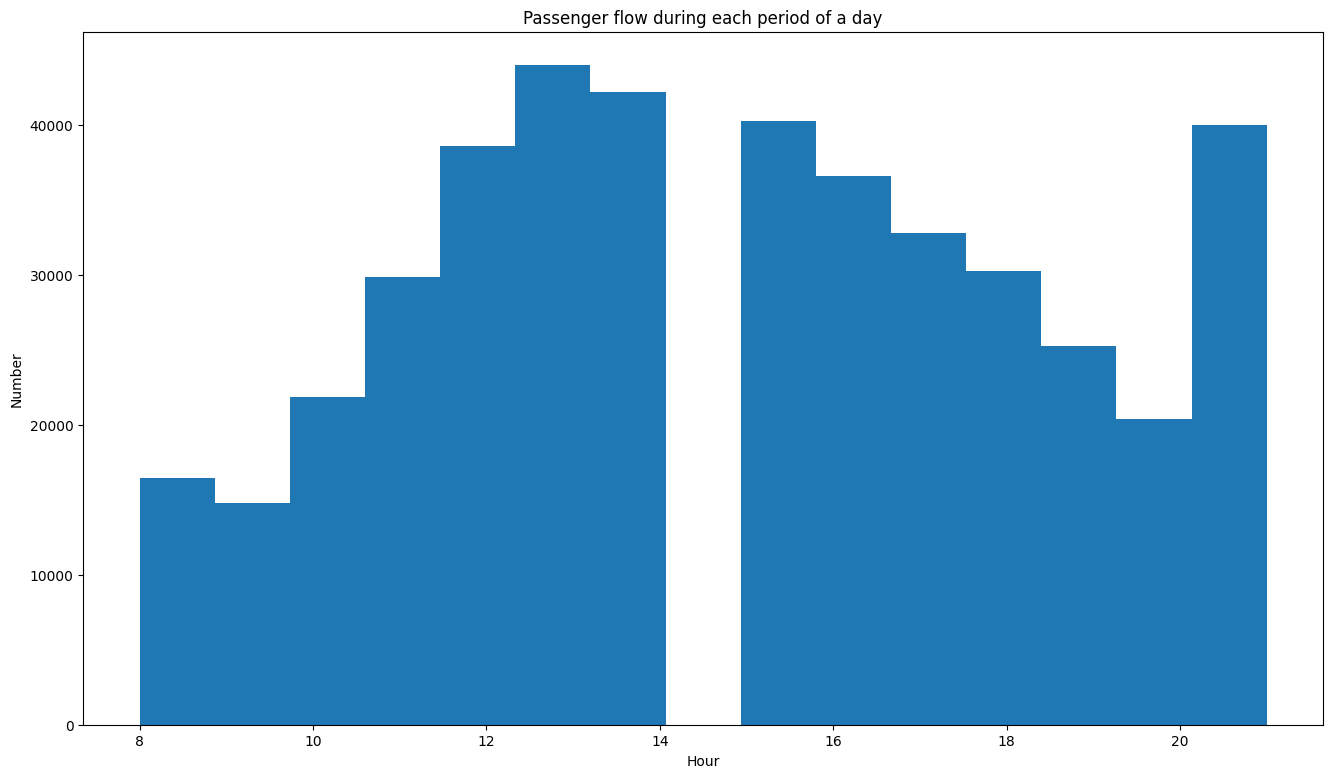

In [ ]:
plt.figure(figsize = (16, 9))
plt.hist(Df['SHOP_HOUR'],bins=15)
plt.xlabel('Hour')
plt.ylabel('Number')
plt.title('Passenger flow during each period of a day')
plt.show()

Text(0.5, 1.0, 'The relationship between average quantity and hour')

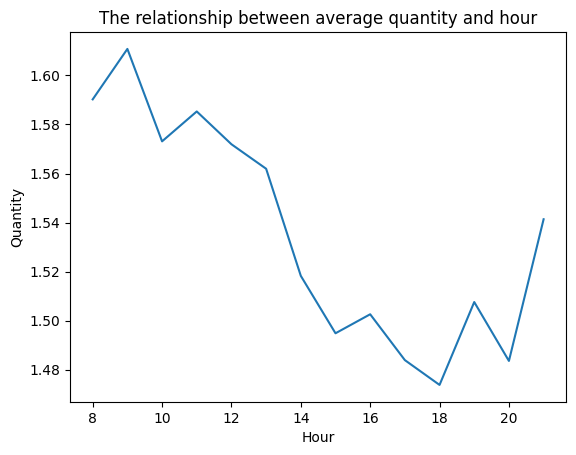

In [ ]:
df1=Df.groupby(['SHOP_HOUR'])[['QUANTITY']].mean()
df1
plt.plot(df1.index,df1['QUANTITY'])
plt.xlabel('Hour')
plt.ylabel('Quantity')
plt.title("The relationship between average quantity and hour")

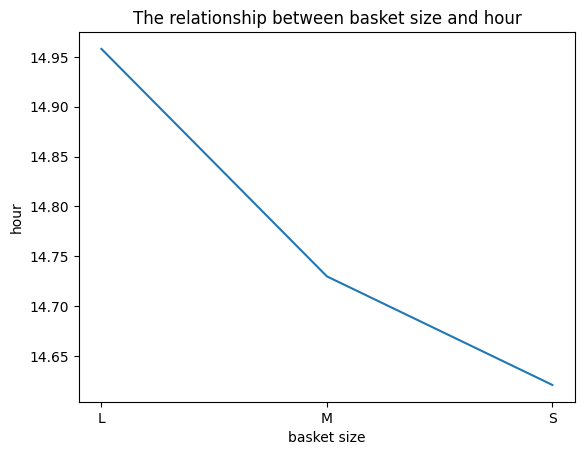

In [ ]:
df2=Df.groupby(['BASKET_SIZE'])[['SHOP_HOUR']].mean()
df2
plt.plot(df2.index,df2['SHOP_HOUR'])
plt.xlabel('basket size')
plt.ylabel('hour')
plt.title("The relationship between basket size and hour")

del(df2)

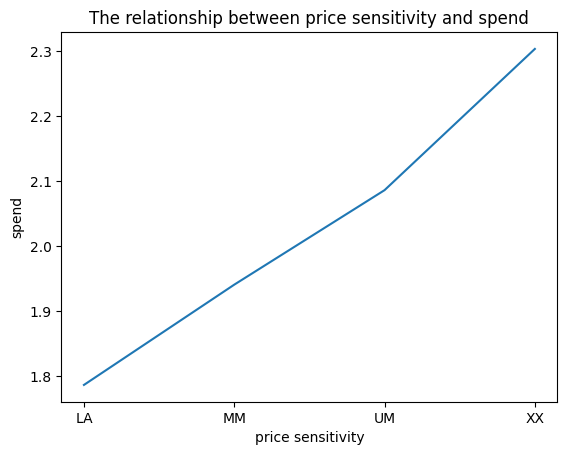

In [ ]:
df4=Df.groupby(['CUST_PRICE_SENSITIVITY'])[['SPEND']].mean()
df4
plt.plot(df4.index,df4['SPEND'])
plt.xlabel('price sensitivity')
plt.ylabel('spend')
plt.title("The relationship between price sensitivity and spend")

del(Df)
del(df4)

In [ ]:
df1 = df.dropna(subset=['CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE'])

In [ ]:
def select(lifestage):
    LA = lifestage[df['CUST_PRICE_SENSITIVITY']=='LA'].CUST_PRICE_SENSITIVITY.count()
    MM = lifestage[df['CUST_PRICE_SENSITIVITY']=='MM'].CUST_PRICE_SENSITIVITY.count()
    UM = lifestage[df['CUST_PRICE_SENSITIVITY']=='UM'].CUST_PRICE_SENSITIVITY.count()
    XX = lifestage[df['CUST_PRICE_SENSITIVITY']=='XX'].CUST_PRICE_SENSITIVITY.count()
    df_lifestage = pd.DataFrame(data=[LA,MM,UM,XX], index=['LA','MM','UM','XX'], columns=['number'])
    return df_lifestage
    #return [LA,MM,UM,XX]

In [ ]:
YA = df1[df1['CUST_LIFESTAGE']=='YA']
OA = df1[df1['CUST_LIFESTAGE']=='OA']
YF = df1[df1['CUST_LIFESTAGE']=='YF']
OF = df1[df1['CUST_LIFESTAGE']=='OF']
PE = df1[df1['CUST_LIFESTAGE']=='PE']
OT = df1[df1['CUST_LIFESTAGE']=='OT']
XX = df1[df1['CUST_LIFESTAGE']=='XX']

YA_sens = select(YA)
OA_sens = select(OA)
YF_sens = select(YF)
OF_sens = select(OF)
PE_sens = select(PE)
OT_sens = select(OT)
XX_sens = select(XX)

<ipython-input-14-334f4a8dd9d9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LA = lifestage[df['CUST_PRICE_SENSITIVITY']=='LA'].CUST_PRICE_SENSITIVITY.count()
<ipython-input-14-334f4a8dd9d9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MM = lifestage[df['CUST_PRICE_SENSITIVITY']=='MM'].CUST_PRICE_SENSITIVITY.count()
<ipython-input-14-334f4a8dd9d9>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  UM = lifestage[df['CUST_PRICE_SENSITIVITY']=='UM'].CUST_PRICE_SENSITIVITY.count()
<ipython-input-14-334f4a8dd9d9>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  XX = lifestage[df['CUST_PRICE_SENSITIVITY']=='XX'].CUST_PRICE_SENSITIVITY.count()
<ipython-input-14-334f4a8dd9d9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LA = lifestage[df['CUST_PRICE_SENSITIVITY']=='LA'].CUST_PRICE_SENSITIVITY.count()
<ipython-input-14-334f4a8

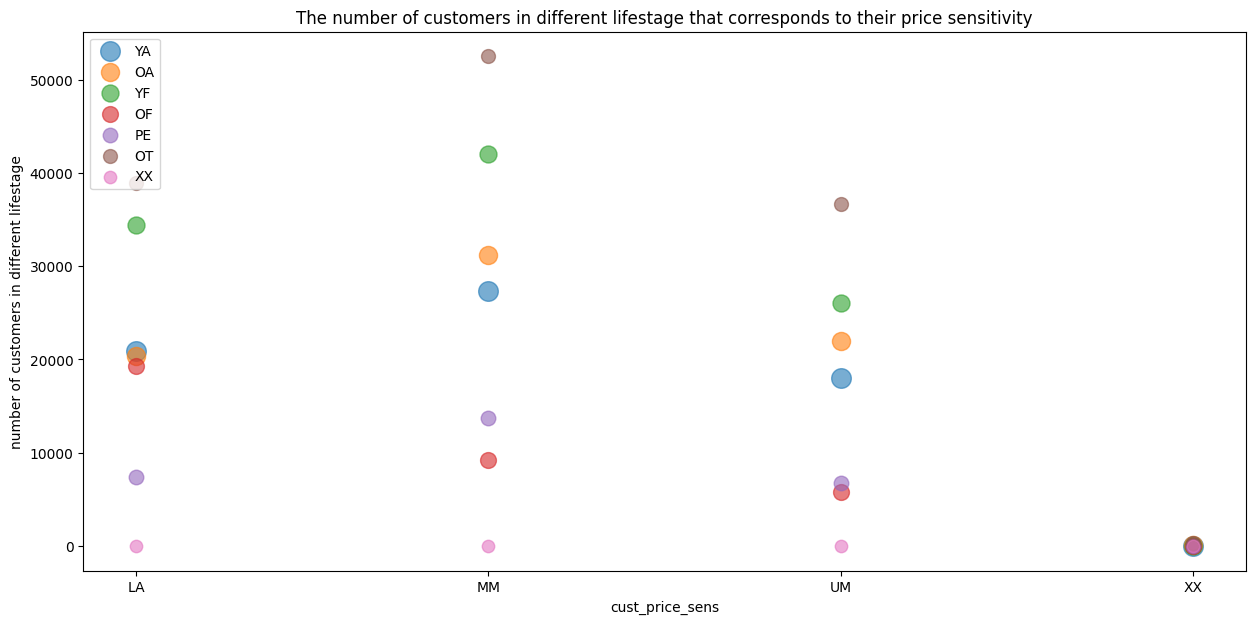

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
plt.title('The number of customers in different lifestage that corresponds to their price sensitivity')
plt.xlabel('cust_price_sens')
plt.ylabel('number of customers in different lifestage')
YAs = plt.scatter(['LA','MM','UM','XX'],YA_sens, s=200, alpha=0.6)
OAs = plt.scatter(['LA','MM','UM','XX'],OA_sens, s=170, alpha=0.6)
YFs = plt.scatter(['LA','MM','UM','XX'],YF_sens, s=150, alpha=0.6)
OFs = plt.scatter(['LA','MM','UM','XX'],OF_sens, s=130, alpha=0.6)
PEs = plt.scatter(['LA','MM','UM','XX'],PE_sens, s=110, alpha=0.6)
OTs = plt.scatter(['LA','MM','UM','XX'],OT_sens, s=100, alpha=0.6)
XXs = plt.scatter(['LA','MM','UM','XX'],XX_sens, s=80, alpha=0.6)
plt.legend([YAs,OAs,YFs,OFs,PEs,OTs,XXs],['YA','OA','YF','OF','PE','OT','XX'],loc='upper left')
plt.show()

Text(0.5, 1.0, 'Composition of the customers price sensitivity')

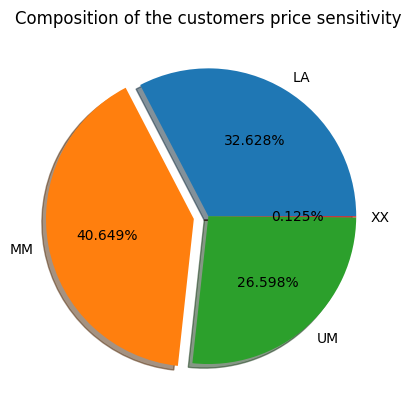

In [ ]:
labels = ['LA','MM','UM','XX']
explode = (0,0.1,0,0)
LA = df1[df1['CUST_PRICE_SENSITIVITY']=='LA'].CUST_PRICE_SENSITIVITY.count()
MM = df1[df1['CUST_PRICE_SENSITIVITY']=='MM'].CUST_PRICE_SENSITIVITY.count()
UM = df1[df1['CUST_PRICE_SENSITIVITY']=='UM'].CUST_PRICE_SENSITIVITY.count()
XX = df1[df1['CUST_PRICE_SENSITIVITY']=='XX'].CUST_PRICE_SENSITIVITY.count()
plt.pie([LA,MM,UM,XX],explode=explode,labels=labels,autopct='%1.3f%%',
        shadow=True)
plt.title('Composition of the customers price sensitivity' )

Text(0, 0.5, 'number of customers in OT')

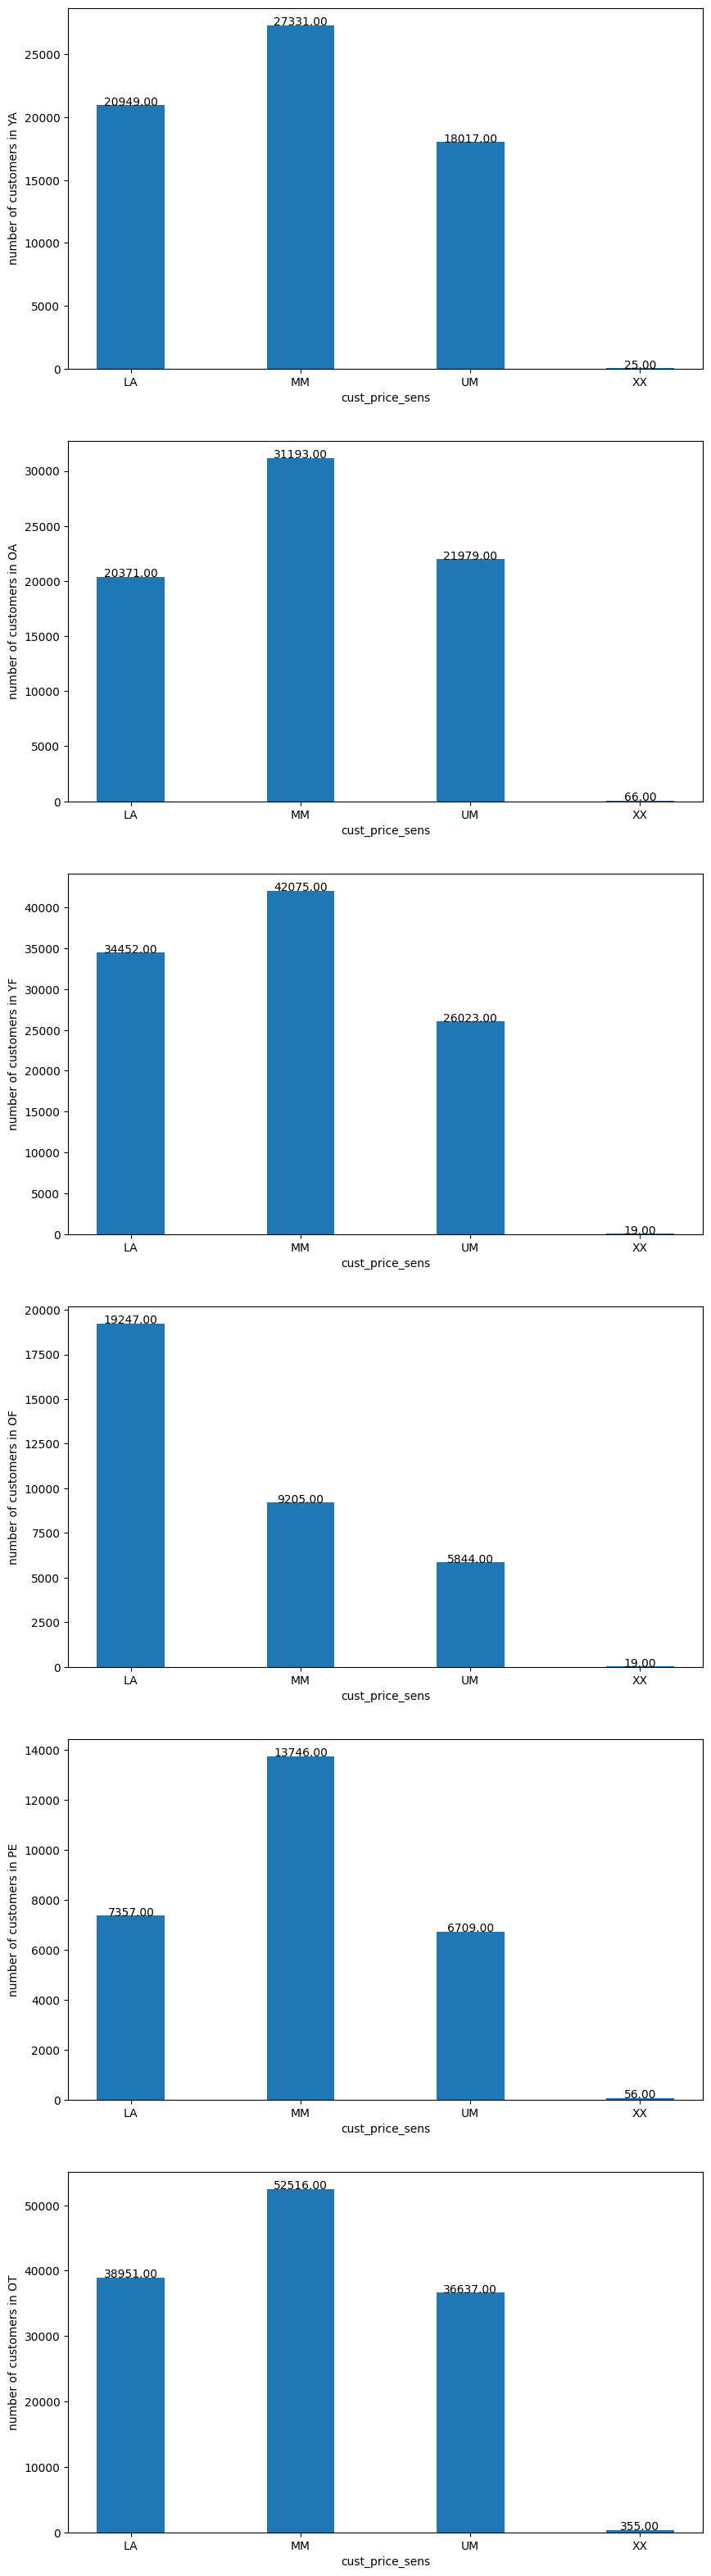

In [ ]:
X = ['LA','MM','UM','XX']
fig, ax = plt.subplots(6, 1, figsize=(10,40))

ax[0].bar(['LA','MM','UM','XX'],YA_sens['number'],width=0.4)
Y0 = YA_sens['number']
for x,y in zip(X,Y0):
    ax[0].text(x,y+0.05,'%.2f' %y, ha='center')
ax[0].set_xlabel('cust_price_sens')
ax[0].set_ylabel('number of customers in YA')

ax[1].bar(['LA','MM','UM','XX'],OA_sens['number'],width=0.4)
Y1 = OA_sens['number']
for x,y in zip(X,Y1):
    ax[1].text(x,y+0.05,'%.2f' %y, ha='center')
ax[1].set_xlabel('cust_price_sens')
ax[1].set_ylabel('number of customers in OA')

ax[2].bar(['LA','MM','UM','XX'],YF_sens['number'],width=0.4)
Y2 = YF_sens['number']
for x,y in zip(X,Y2):
    ax[2].text(x,y+0.05,'%.2f' %y, ha='center')
ax[2].set_xlabel('cust_price_sens')
ax[2].set_ylabel('number of customers in YF')

ax[3].bar(['LA','MM','UM','XX'],OF_sens['number'],width=0.4)
Y3 = OF_sens['number']
for x,y in zip(X,Y3):
    ax[3].text(x,y+0.05,'%.2f' %y, ha='center')
ax[3].set_xlabel('cust_price_sens')
ax[3].set_ylabel('number of customers in OF')

ax[4].bar(['LA','MM','UM','XX'],PE_sens['number'],width=0.4)
Y4 = PE_sens['number']
for x,y in zip(X,Y4):
    ax[4].text(x,y+0.05,'%.2f' %y, ha='center')
ax[4].set_xlabel('cust_price_sens')
ax[4].set_ylabel('number of customers in PE')

ax[5].bar(['LA','MM','UM','XX'],OT_sens['number'],width=0.4)
Y5 = OT_sens['number']
for x,y in zip(X,Y5):
    ax[5].text(x,y+0.05,'%.2f' %y, ha='center')
plt.xlabel('cust_price_sens')
plt.ylabel('number of customers in OT')

Text(0.5, 1.0, 'Composition of the customers lifestage')

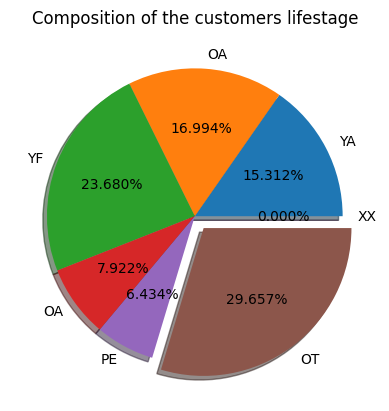

In [ ]:
labels_2 = ['YA','OA','YF','OA','PE','OT','XX']
explode_2 = (0,0,0,0,0,0.1,0)
YA = df1[df1['CUST_LIFESTAGE']=='YA'].CUST_LIFESTAGE.count()
OA = df1[df1['CUST_LIFESTAGE']=='OA'].CUST_LIFESTAGE.count()
YF = df1[df1['CUST_LIFESTAGE']=='YF'].CUST_LIFESTAGE.count()
OF = df1[df1['CUST_LIFESTAGE']=='OF'].CUST_LIFESTAGE.count()
PE = df1[df1['CUST_LIFESTAGE']=='PE'].CUST_LIFESTAGE.count()
OT = df1[df1['CUST_LIFESTAGE']=='OT'].CUST_LIFESTAGE.count()
XX = df1[df1['CUST_LIFESTAGE']=='XX'].CUST_LIFESTAGE.count()
plt.pie([YA,OA,YF,OF,PE,OT,XX],explode=explode_2,labels=labels_2,autopct='%1.3f%%',
        shadow=True)
plt.title('Composition of the customers lifestage' )

In [ ]:
# drop the redundant content and group by individuals
df_p1=df.drop(columns=['PROD_CODE','PROD_CODE_10','PROD_CODE_20','PROD_CODE_30','PROD_CODE_40','BASKET_ID'])
group_p2=df_p1.groupby(['SHOP_WEEK','SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR',
    'CUST_CODE','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE',
    'BASKET_SIZE','BASKET_PRICE_SENSITIVITY','BASKET_TYPE','BASKET_DOMINANT_MISSION',
    'STORE_CODE','STORE_FORMAT','STORE_REGION'],as_index=False).sum()
group_p2.insert(group_p2.shape[1], 'PERSON', 1)
group_p3=group_p2.groupby(['STORE_REGION'],as_index=False).sum()

<ipython-input-20-0c274ad58104>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_p3=group_p2.groupby(['STORE_REGION'],as_index=False).sum()


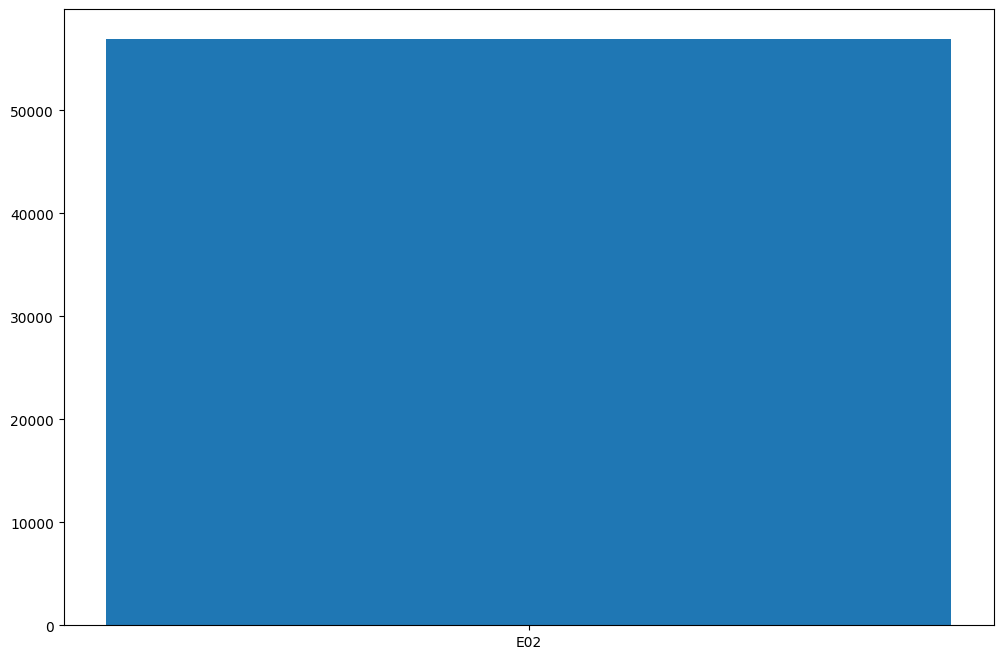

In [ ]:
plt.figure(figsize = (12, 8))
plt.bar(group_p3["STORE_REGION"], group_p3["PERSON"])
plt.show()

del(df_p1)
del(group_p2)
del(group_p3)

In [ ]:
df_seasonal=df.dropna(subset=['CUST_CODE', 'SHOP_DATE'])
df_seasonal=df_seasonal[['CUST_CODE', 'SHOP_DATE']]
df_seasonal=df_seasonal[0:]
df_seasonal['SHOP_DATE']=(df_seasonal['SHOP_DATE']%10000-df_seasonal['SHOP_DATE']%100)/100
df_seasonal.rename(columns={'SHOP_DATE':'shop_month'},inplace=True)
df_seasonal

,CUST_CODE,shop_month
0,CUST0000804514,10.0
1,CUST0000735558,3.0
1115,CUST0000138092,6.0
1116,CUST0000099658,12.0
1117,CUST0000673735,7.0
...,...,...
578077,CUST0000451458,11.0
578078,CUST0000957158,6.0
578079,CUST0000111024,11.0
578080,CUST0000412413,6.0


<Figure size 500x1000 with 0 Axes>

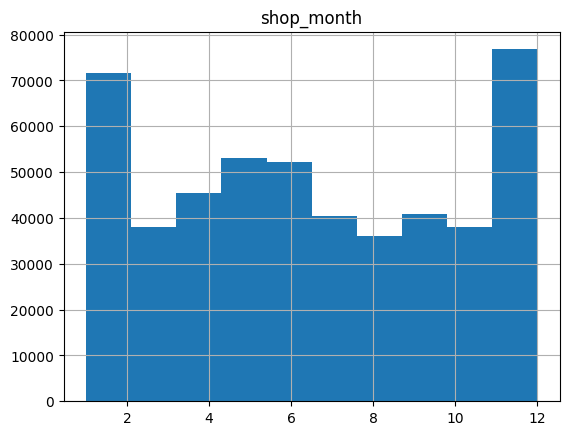

In [ ]:
plt.figure(figsize = (5, 10))
df_seasonal.hist()
plt.show()
del(df_seasonal)

<ipython-input-24-3926d5003244>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data5=data2.groupby(['CUST_CODE'],as_index=False).sum()


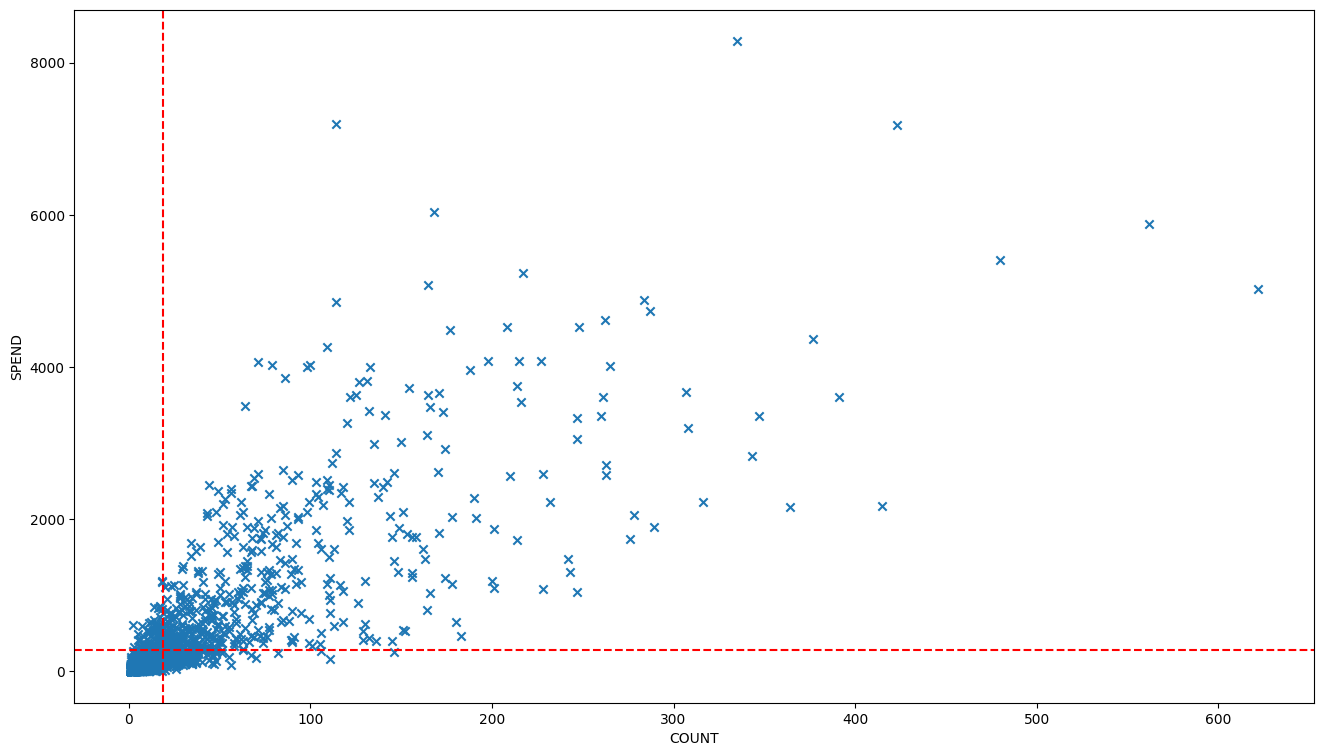

mean:count,spend
18.969030969030968
278.3018215118215
median:count:spend
3.0
31.42


In [ ]:
# using groupby and sum, get the dataframe which contains the information of the visit-times and total-spend of each customer

data1=df.drop(columns=['PROD_CODE','PROD_CODE_10','PROD_CODE_20','PROD_CODE_30','PROD_CODE_40','BASKET_ID'])
data2=data1.groupby(['SHOP_WEEK','SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR',
    'CUST_CODE','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE',
    'BASKET_SIZE','BASKET_PRICE_SENSITIVITY','BASKET_TYPE','BASKET_DOMINANT_MISSION',
    'STORE_CODE','STORE_FORMAT','STORE_REGION'],as_index=False).sum()

data2.insert(data2.shape[1], 'COUNT', 1)
data5=data2.groupby(['CUST_CODE'],as_index=False).sum()
data5.drop(columns=['SHOP_WEEK','SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR'])
plt.figure(figsize = (16, 9))
plt.xlabel('COUNT')
plt.ylabel('SPEND')
plt.scatter(data5["COUNT"],data5["SPEND"],marker='x')
plt.axvline(x=data5['COUNT'].mean(), ls='--', c='red')
plt.axhline(y=data5['SPEND'].mean(), ls='--', c='red')
plt.show()
print('mean:count,spend')
print(data5['COUNT'].mean())
print(data5['SPEND'].mean())
print('median:count:spend')
print(data5['COUNT'].median())
print(data5['SPEND'].median())
data5.head()

del(data1)
del(data2)
del(data5)

In [ ]:
data1=df.drop(columns=['PROD_CODE','PROD_CODE_10','PROD_CODE_20','PROD_CODE_30','PROD_CODE_40','BASKET_ID'])
#data1.head()

In [ ]:
# data2 is the record of a customer buys something at one time

data2=data1.groupby(['SHOP_WEEK','SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR',
    'CUST_CODE','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE',
    'BASKET_SIZE','BASKET_PRICE_SENSITIVITY','BASKET_TYPE','BASKET_DOMINANT_MISSION',
    'STORE_CODE','STORE_FORMAT','STORE_REGION'],as_index=False).sum()
#data2.head()

In [ ]:
data2.insert(data2.shape[1], 'PERSON', 1)
#data2.head()

In [ ]:
data3=data2.groupby(['SHOP_WEEK','SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR','BASKET_TYPE'],as_index=False).sum()
data3

<ipython-input-28-9ff3d22dbbba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data3=data2.groupby(['SHOP_WEEK','SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR','BASKET_TYPE'],as_index=False).sum()


,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,BASKET_TYPE,QUANTITY,SPEND,PERSON
0,200607,20060410,2,8,Small Shop,1,1.27,1
1,200607,20060410,2,8,Top Up,22,37.25,2
2,200607,20060410,2,9,Small Shop,2,2.21,1
3,200607,20060410,2,10,Small Shop,8,12.01,2
4,200607,20060410,2,10,Top Up,42,47.83,2
...,...,...,...,...,...,...,...,...
25943,200819,20080706,1,20,Small Shop,7,5.39,3
25944,200819,20080706,1,20,Top Up,19,24.16,2
25945,200819,20080706,1,21,Full Shop,22,46.88,1
25946,200819,20080706,1,21,Small Shop,14,16.54,6


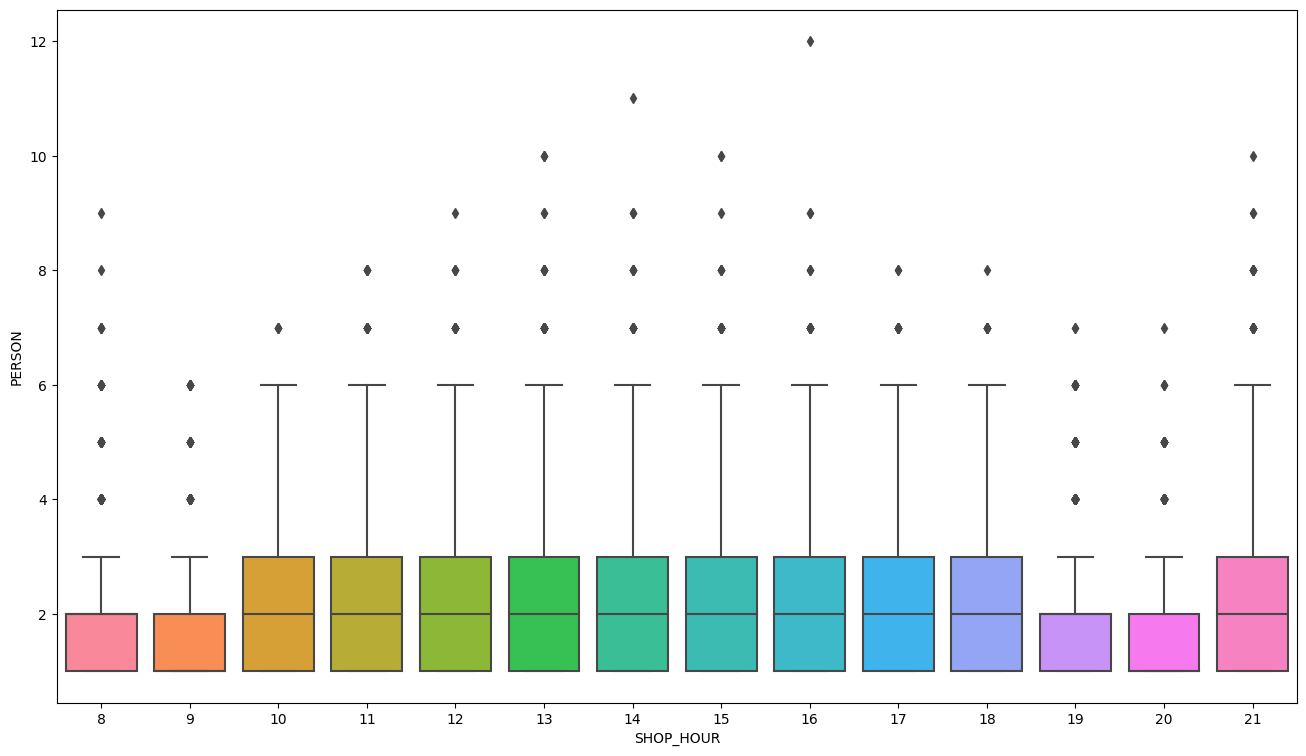

In [ ]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=data3, x="SHOP_HOUR", y="PERSON", saturation=1)
plt.show()

In [ ]:
#reshape x y
x=data3['PERSON']
y=data3['SPEND']

x = np.array(x).reshape((len(x), 1))
y = np.array(y).reshape((len(y), 1))

In [ ]:
#build the linear regression model
lineModel = LinearRegression()
lineModel.fit(x,y)

LinearRegression()

In [ ]:
#get predictions
Y_predict = lineModel.predict(x)

In [ ]:
a1 = lineModel.coef_[0][0]
b = lineModel.intercept_[0]

#score the model
print("y=%.4f*x%.4f" % (a1,b))
print("score:", lineModel.score(x, y))

y=5.5184*x20.0936
score: 0.05013084487356256


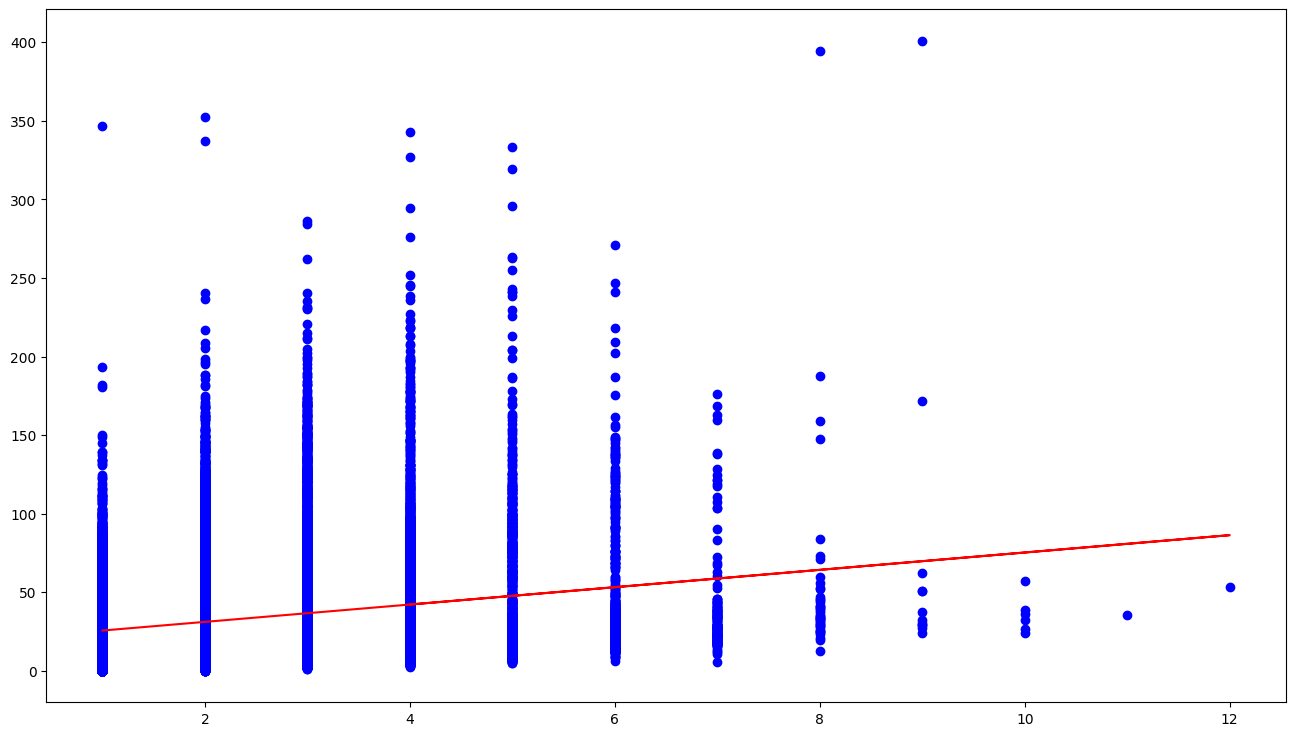

In [ ]:
plt.figure(figsize = (16, 9))
plt.scatter(x, y, c="blue")
plt.plot(x,Y_predict, c="red")
plt.show()

## Product Recommend

In [ ]:
customer_item_matrix = df.pivot_table(
    index='CUST_CODE',
    columns='PROD_CODE',
    values='QUANTITY',
    aggfunc='sum'
)
customer_item_matrix.loc[:].head()

PROD_CODE,PRD0900001,PRD0900002,PRD0900003,PRD0900004,PRD0900005,PRD0900006,PRD0900007,PRD0900008,PRD0900009,PRD0900010,...,PRD0904987,PRD0904988,PRD0904989,PRD0904990,PRD0904992,PRD0904993,PRD0904994,PRD0904995,PRD0904996,PRD0904997
CUST_CODE,,,,,,,,,,,,,,,,,,,,,
CUST0000000181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST0000000689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST0000000998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST0000001163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST0000001194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(customer_item_matrix.shape)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

(3439, 4936)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438
0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.000000,0.018952,0.074001,0.0,0.0,0.051014,0.0,0.065202,...,0.0,0.0,0.0,0.152870,0.029361,0.0,0.0,0.097035,0.082389,0.000000
2,0.0,0.000000,1.000000,0.000000,0.024907,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.027441,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.018952,0.000000,1.000000,0.132186,0.0,0.0,0.112154,0.0,0.000000,...,0.0,0.0,0.0,0.078419,0.129099,0.0,0.0,0.056888,0.054339,0.056614
4,0.0,0.074001,0.024907,0.132186,1.000000,0.0,0.0,0.068424,0.0,0.087454,...,0.0,0.0,0.0,0.125758,0.063010,0.0,0.0,0.097179,0.092825,0.055263


In [ ]:
#Renaming index and column names

user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CUST_CODE,CUST0000000181,CUST0000000689,CUST0000000998,CUST0000001163,CUST0000001194,CUST0000002257,CUST0000002605,CUST0000002637,CUST0000002638,CUST0000002813,...,CUST0000998221,CUST0000998450,CUST0000998703,CUST0000999024,CUST0000999109,CUST0000999439,CUST0000999544,CUST0000999593,CUST0000999935,CUST0000999936
CustomerID,,,,,,,,,,,,,,,,,,,,,
CUST0000000181,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
CUST0000000689,0.0,1.000000,0.000000,0.018952,0.074001,0.0,0.0,0.051014,0.0,0.065202,...,0.0,0.0,0.0,0.152870,0.029361,0.0,0.0,0.097035,0.082389,0.000000
CUST0000000998,0.0,0.000000,1.000000,0.000000,0.024907,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.027441,0.000000,0.0,0.0,0.000000,0.000000,0.000000
CUST0000001163,0.0,0.018952,0.000000,1.000000,0.132186,0.0,0.0,0.112154,0.0,0.000000,...,0.0,0.0,0.0,0.078419,0.129099,0.0,0.0,0.056888,0.054339,0.056614
CUST0000001194,0.0,0.074001,0.024907,0.132186,1.000000,0.0,0.0,0.068424,0.0,0.087454,...,0.0,0.0,0.0,0.125758,0.063010,0.0,0.0,0.097179,0.092825,0.055263


In [ ]:
user_user_sim_matrix.loc['CUST0000001194'].sort_values(ascending=False).head(10)

CUST_CODE
CUST0000001194    1.000000
CUST0000591629    0.215983
CUST0000144953    0.215219
CUST0000142044    0.212702
CUST0000372422    0.210271
CUST0000461850    0.210091
CUST0000872455    0.208311
CUST0000774171    0.204971
CUST0000325292    0.203943
CUST0000448280    0.203357
Name: CUST0000001194, dtype: float64

In [53]:
user_user_sim_matrix.loc['CUST0000001194'].sort_values(ascending=False)
items_bought_by_A = customer_item_matrix.loc['CUST0000001194'][customer_item_matrix.loc['CUST0000001194']>0]
print("Items Bought by A: ")
print(items_bought_by_A)

Items Bought by A: 
PROD_CODE
PRD0900017    1
PRD0900025    1
PRD0900030    1
PRD0900051    1
PRD0900056    1
             ..
PRD0904976    1
PRD0904978    1
PRD0904982    1
PRD0904985    1
PRD0904987    1
Name: CUST0000001194, Length: 403, dtype: int64


In [52]:
items_bought_by_B = customer_item_matrix.loc['CUST0000591629'][customer_item_matrix.loc['CUST0000591629']>0]
print("Items bought by B:")
print(items_bought_by_B)

print()

items_to_recommend_to_B = set(items_bought_by_A.index) - set(items_bought_by_B.index)
print("Items to Recommend to B ")
print(items_to_recommend_to_B)

Items bought by B:
PROD_CODE
PRD0900008    1
PRD0900009    1
PRD0900011    1
PRD0900016    1
PRD0900025    1
             ..
PRD0904933    1
PRD0904944    1
PRD0904950    1
PRD0904959    1
PRD0904962    1
Name: CUST0000591629, Length: 349, dtype: int64

Items to Recommend to B 
{'PRD0904883', 'PRD0904789', 'PRD0903364', 'PRD0900403', 'PRD0902927', 'PRD0903409', 'PRD0903418', 'PRD0904157', 'PRD0902279', 'PRD0901513', 'PRD0904036', 'PRD0902425', 'PRD0904217', 'PRD0902675', 'PRD0901066', 'PRD0903441', 'PRD0901861', 'PRD0900051', 'PRD0904987', 'PRD0901652', 'PRD0900870', 'PRD0902236', 'PRD0904379', 'PRD0904045', 'PRD0902235', 'PRD0901017', 'PRD0904013', 'PRD0902897', 'PRD0902033', 'PRD0903114', 'PRD0901092', 'PRD0903872', 'PRD0900735', 'PRD0901906', 'PRD0901715', 'PRD0900185', 'PRD0902740', 'PRD0902056', 'PRD0900224', 'PRD0902643', 'PRD0904616', 'PRD0904102', 'PRD0901026', 'PRD0901134', 'PRD0902116', 'PRD0901829', 'PRD0903832', 'PRD0901242', 'PRD0903185', 'PRD0900679', 'PRD0901469', 'PRD09

In [57]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['PROD_CODE'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('PROD_CODE')

In [55]:
print(item_item_sim_matrix)

PROD_CODE   PRD0900001  PRD0900002  PRD0900003  PRD0900004  PRD0900005  \
PROD_CODE                                                                
PRD0900001    1.000000    0.049477    0.048224    0.060999    0.066733   
PRD0900002    0.049477    1.000000    0.051299    0.064889    0.047325   
PRD0900003    0.048224    0.051299    1.000000    0.000000    0.092253   
PRD0900004    0.060999    0.064889    0.000000    1.000000    0.058346   
PRD0900005    0.066733    0.047325    0.092253    0.058346    1.000000   
...                ...         ...         ...         ...         ...   
PRD0904993    0.055685    0.059235    0.000000    0.000000    0.106525   
PRD0904994    0.138137    0.073472    0.035806    0.045291    0.016516   
PRD0904995    0.110056    0.023415    0.000000    0.057735    0.042108   
PRD0904996    0.044023    0.000000    0.000000    0.115470    0.084215   
PRD0904997    0.034986    0.111648    0.072548    0.045883    0.000000   

PROD_CODE   PRD0900006  PRD0900007  P

In [58]:
top_10_similar_items = list(item_item_sim_matrix.loc['PRD0904883'].sort_values(ascending=False).iloc[:10].index)

print(top_10_similar_items)
print()
print(df.loc[
    df['PROD_CODE'].isin(top_10_similar_items),
    ['PROD_CODE', 'PROD_CODE_10']
].drop_duplicates().set_index('PROD_CODE').loc[top_10_similar_items])

['PRD0904883', 'PRD0902061', 'PRD0901192', 'PRD0901878', 'PRD0903145', 'PRD0904250', 'PRD0903571', 'PRD0900385', 'PRD0901627', 'PRD0900922']

           PROD_CODE_10
PROD_CODE              
PRD0904883      CL00058
PRD0902061      CL00062
PRD0901192      CL00105
PRD0901878      CL00043
PRD0903145      CL00010
PRD0904250      CL00045
PRD0903571      CL00034
PRD0900385      CL00036
PRD0901627      CL00039
PRD0900922      CL00058
